In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/var/folders/1q/pxg1hlx56lz11cdmbw68kpw00000gn/T/ipykernel_28262/4189307431.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




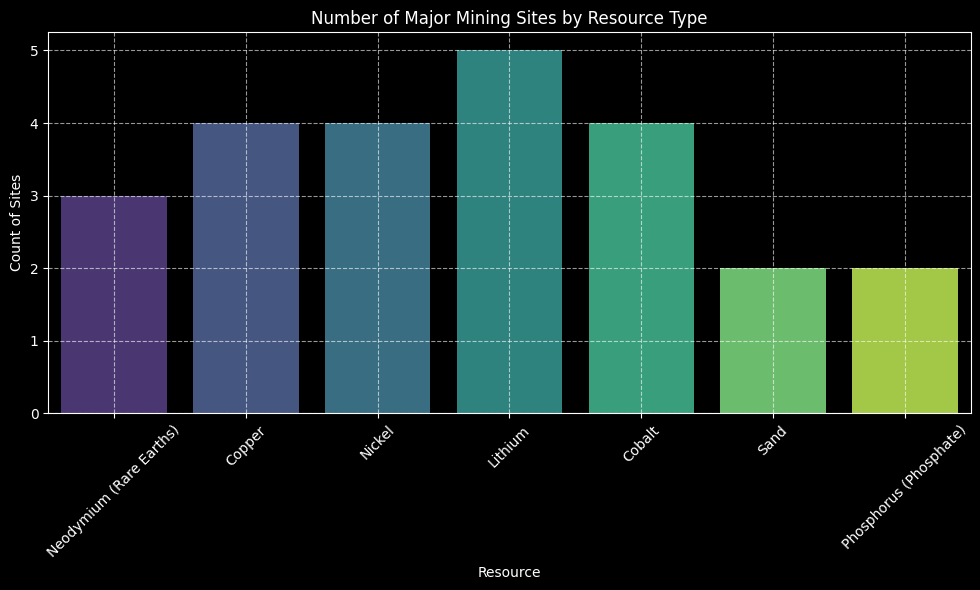

In [16]:
# Data prep: basic counts of sites by resource type
resource_counts = {
    "Neodymium (Rare Earths)": 3,
    "Copper": 4,
    "Nickel": 4,
    "Lithium": 5,
    "Cobalt": 4,
    "Sand": 2,
    "Phosphorus (Phosphate)": 2
}

# Convert to DataFrame
df_resources = pd.DataFrame(list(resource_counts.items()), columns=['Resource', 'Count'])

# Plotting with matplotlib + seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resources, x='Resource', y='Count', palette='viridis')
plt.title("Number of Major Mining Sites by Resource Type")
plt.xticks(rotation=45)
plt.ylabel("Count of Sites")
plt.xlabel("Resource")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [17]:
# Rebuilding the dataset
data = pd.DataFrame([
    ["Neodymium (Rare Earths)", "Bayan Obo", "China (Inner Mongolia)", 41.78278, 109.97361, ">40000000 t REO", "Active – major producer"],
    ["Neodymium (Rare Earths)", "Mountain Pass", "USA (California)", 35.46833, -115.53333, "~1500000 t REO", "Active – producing mine"],
    ["Copper", "Escondida", "Chile (Antofagasta)", -24.26700, -69.06700, "34.7 Mt Cu metal", "Active – ~1 Mt Cu/yr"],
    ["Nickel", "Norilsk-Talnakh", "Russia (Krasnoyarsk)", 69.35350, 88.20270, "~400000 t Ni", "Active – multiple mines"],
    ["Lithium", "Salar de Uyuni", "Bolivia (Potosí)", -20.26656, -67.62055, "~5400000 t Li", "Pilot – vast salt flat resource"],
    ["Cobalt", "Mutanda", "DRC (Lualaba)", -10.78580, 25.80820, "~1.2 Mt Co", "Active – restarting"],
    ["Sand", "Poyang Lake", "China (Jiangxi)", 29.08300, 116.28300, "N/A", "~236e6 m³ sand/yr extracted"],
    ["Phosphorus (Phosphate)", "Nauru", "Republic of Nauru", -0.52278, 166.93150, "~43 Mt mined (depleted)", "Inactive – resource exhausted"]
], columns=["Resource", "Site", "Country (Region)", "Latitude", "Longitude", "Estimated_Reserves", "Status/Production"])

# Create the plot
fig = px.scatter_geo(
    data,
    lat="Latitude",
    lon="Longitude",
    text="Site",
    hover_name="Resource",
    hover_data={
        "Country (Region)": True,
        "Estimated_Reserves": True,
        "Status/Production": True
    },
    color="Resource",
    projection="orthographic",  # globe view
    title="Global Distribution of Major Raw Material Mines"
)

fig.update_layout(
    geo=dict(
        showland=True, landcolor="rgb(229, 229, 229)",
        showcountries=True, countrycolor="black",
        showocean=True, oceancolor="LightBlue"
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [24]:
# Example: Export 20 frames of a spinning Plotly globe
for i in range(20):
    fig.update_geos(projection_rotation=dict(lon=i*18))
    fig.write_image(f"frame{i:02}.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [19]:
# Create a scatter_geo plot using Plotly
fig = px.scatter_geo(
    data,
    lat="Latitude",
    lon="Longitude",
    text="Site",
    hover_name="Resource",
    hover_data={
        "Country (Region)": True,
        "Estimated_Reserves": True,
        "Status/Production": True,
        "Latitude": False,
        "Longitude": False
    },
    color="Resource",
    projection="orthographic",  # 3D-like globe
    title="Global Distribution of Major Raw Material Mines"
)

fig.update_layout(
    geo=dict(
        showland=True, landcolor="rgb(229, 229, 229)",
        showcountries=True, countrycolor="black",
        showocean=True, oceancolor="LightBlue"
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

In [22]:
# Example data
data = {
    'Resource': ['Copper', 'Lithium', 'Nickel', 'Neodymium', 'Cobalt', 'Sand', 'Phosphate'],
    'Reserves (tons)': [880e6, 22e6, 95e6, 8e6, 7e6, 1e12, 71000e6],
    'Annual Production (tons)': [22e6, 130000, 3.3e6, 240000, 170000, 50e9, 220e6],
    'Annual Growth Rate (%)': [2, 10, 4, 5, 7, 1, 0] # approximate estimates
}

df = pd.DataFrame(data)
print(df)

    Resource  Reserves (tons)  Annual Production (tons)  \
0     Copper     8.800000e+08              2.200000e+07   
1    Lithium     2.200000e+07              1.300000e+05   
2     Nickel     9.500000e+07              3.300000e+06   
3  Neodymium     8.000000e+06              2.400000e+05   
4     Cobalt     7.000000e+06              1.700000e+05   
5       Sand     1.000000e+12              5.000000e+10   
6  Phosphate     7.100000e+10              2.200000e+08   

   Annual Growth Rate (%)  
0                       2  
1                      10  
2                       4  
3                       5  
4                       7  
5                       1  
6                       0  


$ 
\text{Static Years Left} = \frac{\text{Reserves (tons)}}{\text{Annual Production (tons)}}
$

$
r = \frac{\text{Annual Growth Rate (\%)}}{100}
$

\text{Dynamic Years Left} = 
\begin{cases}
\frac{\text{Reserves (tons)}}{\text{Annual Production (tons)}}, & \text{if } r = 0 \\
\frac{\ln\left(1 + r \times \frac{\text{Reserves (tons)}}{\text{Annual Production (tons)}}\right)}{\ln(1+r)} - 1, & \text{if } r \neq 0
\end{cases}
$

In [20]:
# Functions
def static_years_left(reserves, annual_prod):
    return reserves / annual_prod

def dynamic_years_left(reserves, annual_prod, growth_rate_percent):
    r = growth_rate_percent / 100
    if r == 0:
        return reserves / annual_prod
    else:
        T = math.log(1 + r * (reserves / annual_prod)) / math.log(1 + r) - 1
        return T

# Apply calculations
df['Static Years Left'] = df.apply(lambda row: static_years_left(row['Reserves (tons)'], row['Annual Production (tons)']), axis=1)
df['Dynamic Years Left'] = df.apply(lambda row: dynamic_years_left(row['Reserves (tons)'], row['Annual Production (tons)'], row['Annual Growth Rate (%)']), axis=1)

print(df[['Resource', 'Static Years Left', 'Dynamic Years Left']])

    Resource  Static Years Left  Dynamic Years Left
0     Copper          40.000000           28.682257
1    Lithium         169.230769           29.281016
2     Nickel          28.787879           18.534890
3  Neodymium          33.333333           19.103012
4     Cobalt          41.176471           19.048308
5       Sand          20.000000           17.323165
6  Phosphate         322.727273          322.727273
